In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

#loading iris dataset
iris= datasets.load_iris()

#X-features, Y-Target
X=iris.data
Y=iris.target

#importing SVM
from sklearn.svm import SVC

#setting SVM class object
model = SVC()

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
from sklearn import metrics
Y_pred = model.predict(X_test)

print metrics.accuracy_score(Y_pred,Y_test)

0.947368421053


In [4]:
# CONCLUSION: accuracy is 94.7% with SVM

### using 4 different kernel types in SVM
### linear models, a Gaussian Radial Basis Function 
### and SVC with polynomial(3rd degree)
The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

1. LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
2. LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction

In [5]:
from sklearn import svm
# using only two features (for 2d plots) 
# and not spillting the data into train/test

X=iris.data[:,:2]
Y=iris.target

#SVM regularization parameter
C= 1.0

#svc with a linear kernel(one done previously)
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

#Gaussian RBF
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

#SVC with 3rd degree polynomial
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

#SVC_Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y) 

In [6]:
#set step size
h=0.02

#X axis min and max
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1 

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

#Finally numpy can create a meshgrid
xx,yy =np.meshgrid(np.arange(x_min,x_max, h),np.arange(y_min,y_max,h))


In [7]:
#plot titles
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

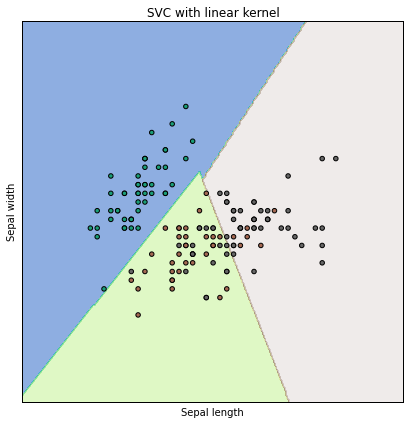

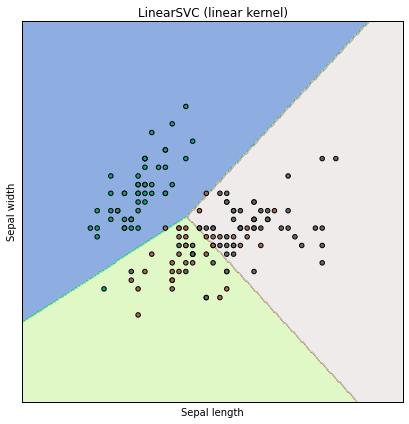

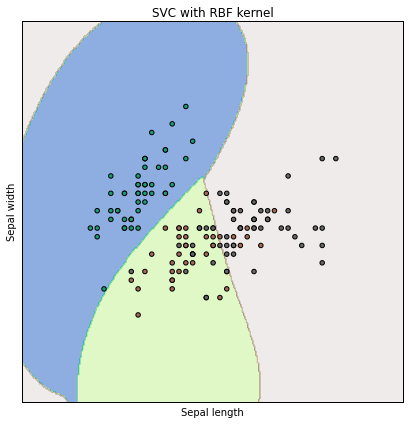

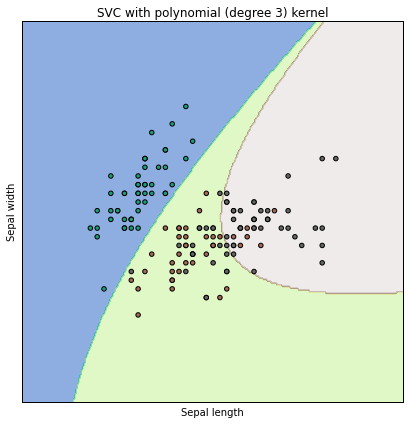

In [18]:
# use enumerate for a count
for i,ker in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    #Plotting the decision bondary. 
    #For that, assigning a color to each point in mesh
    #[x_min, x_max]x[y_min, y_max]
    plt.figure(figsize=(15,15))
    #set subplot position(Size=2 by 2, position decided by i)
    plt.subplot(2,2,i+1)
    #subplot spacing
    #plt.subplots_adjust(wspace=0.01,hspace=0.01)
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = ker.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])